In [1]:
%load_ext watermark


In [2]:
import os

import alifedata_phyloinformatics_convert as apc
import dendropy as dp
from hstrat import _auxiliary_lib as hstrat_aux
import iplotx as ipx
from IPython.display import display
from matplotlib.colors import to_hex
from matplotlib.patches import ConnectionPatch
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
from teeplot import teeplot as tp

import pylib  # noqa: F401


/home/runner/work/hstrat-agentless-concept/hstrat-agentless-concept/.venv/lib/python3.11/site-packages/alifedata_phyloinformatics_convert/_impl/phytrack_Systematcs.py:7: UserWarning: ImportWarning: phylotrackpy.Systematics import failed; inserting a no-op mock for Systematics. This is likely because phylotrackpy is not installed.
  warnings.warn(


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-10-26T00:13:14.858340+00:00

Python implementation: CPython
Python version       : 3.11.13
IPython version      : 7.31.1

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.11.0-1018-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

dendropy                          : 5.0.8
teeplot                           : 1.4.2
hstrat                            : 1.20.14
numpy                             : 2.2.6
iplotx                            : 1.2.0
pylib                             : 0.0.0
pandas                            : 2.2.3
alifedata_phyloinformatics_convert: 0.19.3
polars                            : 1.34.0
seaborn                           : 0.13.2
matplotlib                        : 3.10.7

Watermark: 2.4.3



In [4]:
teeplot_subdir = os.environ.get("NOTEBOOK_NAME", "2025-10-22-gosper_wse-gol")
teeplot_subdir


'2025-10-22-gosper_wse-gol'

## Prep Data


In [5]:
df = pl.concat(
    [
        pl.read_parquet("https://osf.io/b7e8t/download").with_columns(surf=0),
        pl.read_parquet("https://osf.io/2k78y/download").with_columns(surf=1),
        pl.read_parquet("https://osf.io/6cmxa/download").with_columns(surf=2),
    ],
).to_pandas()

display(df.describe()), display(df.head()), display(df.tail());


,id,dstream_data_id,ancestor_id,position,row,col,globalSeed,nCol,nRow,nWav,nTrait,nCycle,_compconf_dummy,CEREBRASLIB_TRAITLOGGER_NUM_BITS,CEREBRASLIB_TRAITLOGGER_DILATION,gol_state,origin_time,hstrat_rank_from_t0,surf
count,1451.000000,1.441000e+03,1451.000000,777.000000,777.000000,777.000000,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,1441.000000,1441.000000,1451.000000
mean,241.339766,4.250048e+18,216.472088,107184.154440,141.760618,154.888031,1.0,755.0,1170.0,8.0,1.0,10000.0,42.0,256.0,8.0,1.0,1257.793893,1193.793893,1.001378
std,139.681538,4.599081e+18,148.564473,77487.472446,102.496087,103.081099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.695328,197.695328,0.815368
min,0.000000,0.000000e+00,0.000000,7586.000000,10.000000,10.000000,1.0,755.0,1170.0,8.0,1.0,10000.0,42.0,256.0,8.0,1.0,94.000000,30.000000,0.000000
25%,120.500000,1.200000e+02,67.000000,29498.000000,39.000000,53.000000,1.0,755.0,1170.0,8.0,1.0,10000.0,42.0,256.0,8.0,1.0,1309.000000,1245.000000,0.000000
50%,241.000000,2.400000e+02,211.000000,103585.000000,137.000000,150.000000,1.0,755.0,1170.0,8.0,1.0,10000.0,42.0,256.0,8.0,1.0,1312.000000,1248.000000,1.000000
75%,362.000000,9.223372e+18,347.000000,176918.000000,234.000000,248.000000,1.0,755.0,1170.0,8.0,1.0,10000.0,42.0,256.0,8.0,1.0,1312.000000,1248.000000,2.000000
max,486.000000,9.223372e+18,483.000000,246469.000000,326.000000,340.000000,1.0,755.0,1170.0,8.0,1.0,10000.0,42.0,256.0,8.0,1.0,1312.000000,1248.000000,2.000000


,id,dstream_data_id,ancestor_id,is_extant,position,row,col,globalSeed,nCol,nRow,...,_compconf_dummy,CEREBRASLIB_TRAITLOGGER_NUM_BITS,CEREBRASLIB_TRAITLOGGER_DILATION,CEREBRASLIB_TRAITLOGGER_DSTREAM_ALGO_NAME,data_hex,gol_state,file,origin_time,hstrat_rank_from_t0,surf
0,0,NaN,0,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,0
1,1,NaN,1,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,0
2,2,NaN,2,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,0
3,3,9.223372e+18,0,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,NaN,NaN,94.0,30.0,0
4,4,9.223372e+18,3,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,NaN,NaN,254.0,190.0,0


,id,dstream_data_id,ancestor_id,is_extant,position,row,col,globalSeed,nCol,nRow,...,_compconf_dummy,CEREBRASLIB_TRAITLOGGER_NUM_BITS,CEREBRASLIB_TRAITLOGGER_DILATION,CEREBRASLIB_TRAITLOGGER_DSTREAM_ALGO_NAME,data_hex,gol_state,file,origin_time,hstrat_rank_from_t0,surf
1446,478,9.223372e+18,477,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,NaN,NaN,1311.0,1247.0,2
1447,479,2.550000e+02,478,False,245714.0,325.0,339.0,1.0,755.0,1170.0,...,42.0,256.0,8.0,steady_algo,0000000100000521e00e327c284b3c48,1.0,a=surfaces+i=2+ext=.pqt,1312.0,1248.0,2
1448,480,2.560000e+02,478,False,245715.0,325.0,340.0,1.0,755.0,1170.0,...,42.0,256.0,8.0,steady_algo,0000000100000521e00e327c284b3c48,1.0,a=surfaces+i=2+ext=.pqt,1312.0,1248.0,2
1449,481,2.570000e+02,477,False,246468.0,326.0,338.0,1.0,755.0,1170.0,...,42.0,256.0,8.0,steady_algo,0000000100000521e00e327c204b3c48,1.0,a=surfaces+i=2+ext=.pqt,1312.0,1248.0,2
1450,482,2.580000e+02,475,False,246469.0,326.0,339.0,1.0,755.0,1170.0,...,42.0,256.0,8.0,steady_algo,0000000100000521e00e327ca84b3c48,1.0,a=surfaces+i=2+ext=.pqt,1312.0,1248.0,2


In [6]:
df.columns


Index(['id', 'dstream_data_id', 'ancestor_id', 'is_extant', 'position', 'row',
       'col', 'globalSeed', 'nCol', 'nRow', 'nWav', 'nTrait', 'nCycle',
       'replicate', '_compconf_dummy', 'CEREBRASLIB_TRAITLOGGER_NUM_BITS',
       'CEREBRASLIB_TRAITLOGGER_DILATION',
       'CEREBRASLIB_TRAITLOGGER_DSTREAM_ALGO_NAME', 'data_hex', 'gol_state',
       'file', 'origin_time', 'hstrat_rank_from_t0', 'surf'],
      dtype='object')

In [7]:
df = pd.concat(
    [hstrat_aux.alifestd_mark_root_id(dfs) for _, dfs in df.groupby("surf")],
    ignore_index=True,
)
df["taxon_label"] = df["id"]


## Example Plot


In [8]:
trees_0 = apc.alife_dataframe_to_dendropy_trees(
    hstrat_aux.alifestd_try_add_ancestor_list_col(df[df["surf"] == 0]),
    setup_edge_lengths=True,
)
trees_0


In [9]:
trees_1 = apc.alife_dataframe_to_dendropy_trees(
    hstrat_aux.alifestd_try_add_ancestor_list_col(df[df["surf"] == 1]),
    setup_edge_lengths=True,
)
trees_1


In [10]:
trees_2 = apc.alife_dataframe_to_dendropy_trees(
    hstrat_aux.alifestd_try_add_ancestor_list_col(df[df["surf"] == 2]),
    setup_edge_lengths=True,
)
trees_2


In [11]:
grid_dim = int(df[df["gol_state"] >= 0][["row", "col"]].to_numpy().max()) + 1
grid_dim


341

teeplots/2025-10-22-gosper_wse-gol/surf=0+viz=subplots+ext=.pdf
teeplots/2025-10-22-gosper_wse-gol/surf=0+viz=subplots+ext=.png


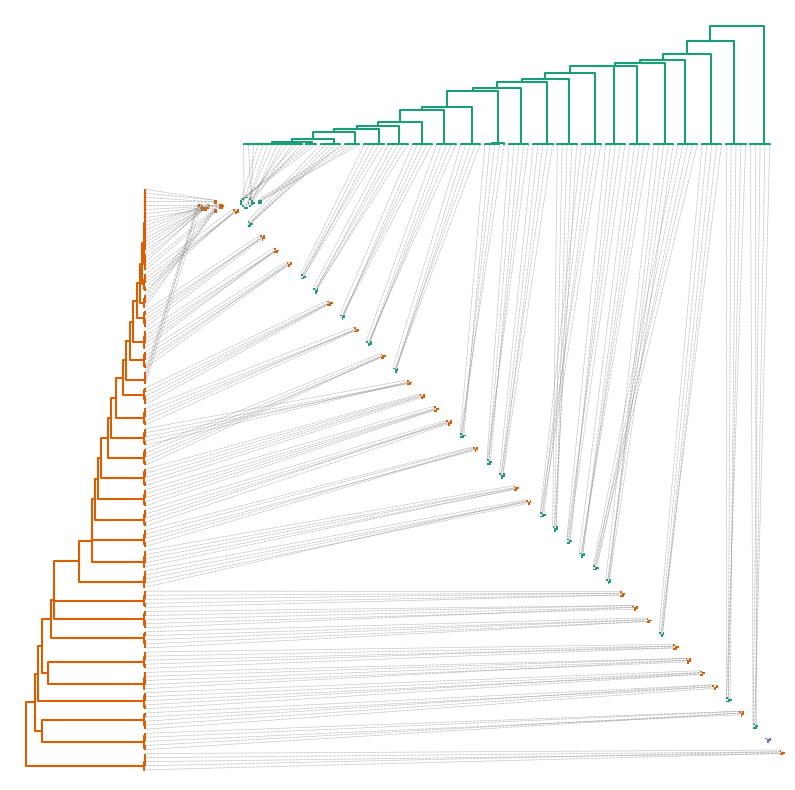

teeplots/2025-10-22-gosper_wse-gol/surf=1+viz=subplots+ext=.pdf
teeplots/2025-10-22-gosper_wse-gol/surf=1+viz=subplots+ext=.png


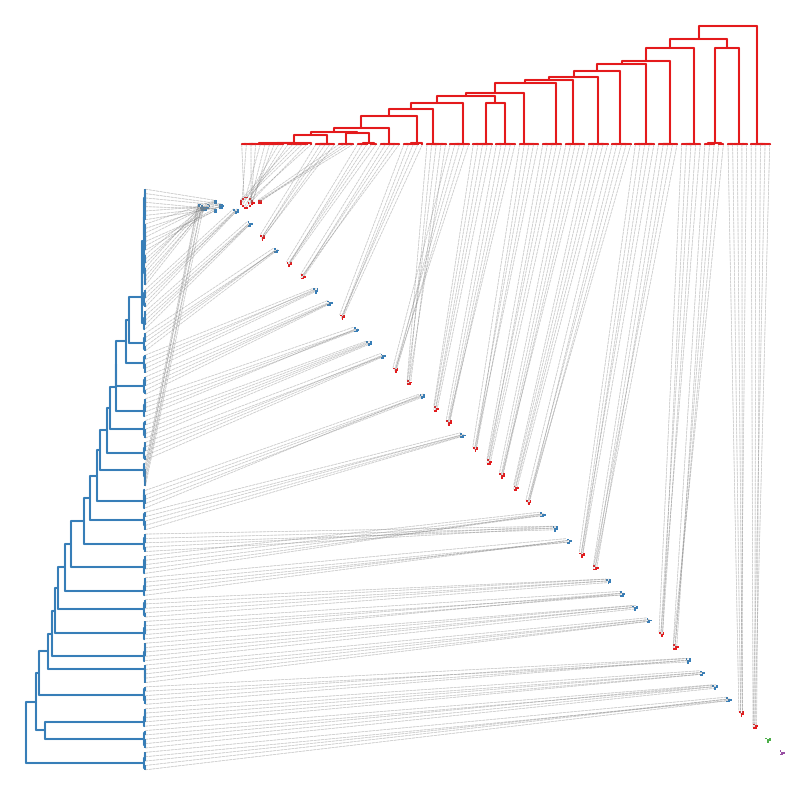

teeplots/2025-10-22-gosper_wse-gol/surf=2+viz=subplots+ext=.pdf
teeplots/2025-10-22-gosper_wse-gol/surf=2+viz=subplots+ext=.png


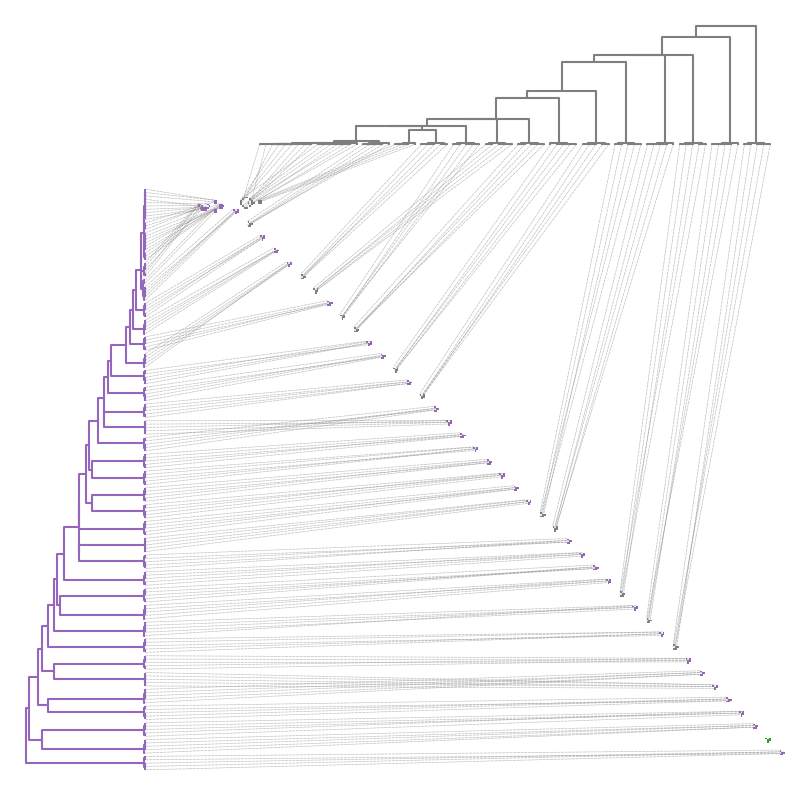

In [12]:
for i, target in enumerate([trees_0, trees_1, trees_2]):
    with tp.teed(
        plt.subplots,
        2,
        2,
        figsize=(10, 10),
        gridspec_kw={
            'width_ratios': [0.2, 0.8],
            'height_ratios': [0.2, 0.8],
            'wspace': 0.05,
            'hspace': 0.05,
        },
        teeplot_outattrs=dict(surf=i),
        teeplot_subdir=teeplot_subdir,
    ) as teed:
        fig, ((ax_corner, ax_top), (ax_left, ax_grid)) = teed

        grid = np.full((grid_dim, grid_dim), np.nan)
        for _, row in df[(df["surf"] == i) & (df["gol_state"] >= 0)].iterrows():
            grid[int(row["row"]), int(row["col"])] = row["root_id"]

        ax_corner.axis('off')

        cmap = sns.color_palette(["Dark2", "Set1", "tab10_r"][i], len(target))

        tree_top = ipx.plotting.tree(
            target[0],
            ax=ax_top,
            layout="vertical",
            edge_color=to_hex(cmap[0]),
            edge_linewidth=1.5,
            margins=0.0,
        )
        ax_top.margins(x=-0.04)
        ax_top.set_xlim(ax_top.get_xlim()[0] - 10, None)

        tree_left = ipx.plotting.tree(
            target[1],
            ax=ax_left,
            edge_color=to_hex(cmap[1]),
            edge_linewidth=1.5,
            margins=0.0,
        )
        ax_left.invert_yaxis()
        ax_left.margins(y=-0.05)

        sns.heatmap(
            grid,
            ax=ax_grid,
            cmap=cmap,
            vmin=0,
            vmax=len(target) - 1,
            cbar=False,
        )
        ax_grid.set_axis_off()

        dfi = df[df["surf"] == i].copy()
        dfi = hstrat_aux.alifestd_mark_leaves(dfi, mutate=True)

        for idx, row in dfi[dfi["is_leaf"]].iterrows():
            axis = [ax_top, ax_left, None, None][row["root_id"]]
            tree = [tree_top, tree_left, None, None][row["root_id"]]
            if axis is None:
                continue
            tree_x, tree_y = next(
                v for n, v in tree.get_layout().T.items()
                if n.taxon is not None and n.taxon.label == row["id"]
            )
            grid_x, grid_y = row["col"], row["row"]

            # draw line between axes from (tree_x, tree_y) to (grid_x, grid_y)
            con = ConnectionPatch(
                xyA=(tree_x, tree_y),
                xyB=(grid_x, grid_y),
                coordsA=axis.transData,
                coordsB=ax_grid.transData,
                color="gray",
                linestyle="--",
                alpha=0.5,
                linewidth=0.5,
                clip_on=False,
            )
            fig.add_artist(con)
